In [1]:
import pandas as pd
from IPython.display import HTML

In [2]:
# The function below is useful when I disply dataframes.
# We can display multiple dataframes side by side.
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [3]:
maps_scores = pd.read_csv("../data/vct_2022/matches/maps_scores.csv")
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07


In [4]:
overview = pd.read_csv("../data/vct_2022/matches/overview.csv")
overview["Agents"] = overview["Agents"].apply(lambda x: str(x).replace(" ",""))
overview.head()

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating,Average Combat Score,...,Deaths,Assists,Kills - Deaths (KD),"Kill, Assist, Trade, Survive %",Average Damage per Round,Headshot %,First Kills,First Deaths,Kills - Deaths (FKD),Side
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,1.31,242.0,...,16.0,13.0,6.0,88%,156.0,34%,1.0,0.0,1.0,both
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,1.18,243.0,...,9.0,5.0,2.0,75%,167.0,32%,0.0,0.0,0.0,attack
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,1.45,242.0,...,7.0,8.0,4.0,100%,146.0,35%,1.0,0.0,1.0,defend
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage,1.15,219.0,...,16.0,7.0,4.0,88%,140.0,33%,0.0,4.0,-4.0,both
4,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage,1.04,222.0,...,9.0,4.0,1.0,100%,147.0,29%,0.0,2.0,-2.0,attack


In [5]:
# We don't need all rows from "overview" and the following are index.
ind1 = (overview.Map != "All Maps")    
ind2 = (overview.Side == "both")
ind = (ind1 & ind2)

# We also need only the following features from overview and maps_scores.
overview_keystolook = ["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team", "Agents"]
maps_scores_keystolook = ["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team B", "Team B Score"]


In [6]:
overview_subset = overview[ind][overview_keystolook]
maps_scores_subset = maps_scores[maps_scores_keystolook]

In [7]:
overview_subset

,Tournament,Stage,Match Type,Match Name,Map,Team,Agents
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,fade
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,sage
6,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,astra
9,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,chamber
12,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,raze
...,...,...,...,...,...,...,...
379827,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,raze
379830,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,kayo
379833,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,viper
379836,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,astra


We saw in the "vct_2022_team_comp_exploration.ipynb" that some values in "Agents" column are not valid.\
We only want to consider ones with valid agents.

In [8]:
# I want to define a funtion to get columns of individual characters to do linear regression on maps and characters.
# The following dictionary has all available characters in 2022 tournaments.  Characters played in other years are contained in this dictionary.
roles = {"duelist": {"jett", "phoenix", "reyna", "raze", "yoru", "neon"},
             "initiator": {"sova", "breach", "skye", "kayo", "fade"},
             "controller": {"brimstone", "omen", "viper", "astra"},
             "sentinel": {"cypher", "sage", "killjoy", "chamber"}}  
allcharacters = set()
for role, chars in roles.items():
    allcharacters = allcharacters.union(roles[role])

In [9]:
overview_subset = overview_subset[overview_subset["Agents"].isin(allcharacters)]
overview_subset

,Tournament,Stage,Match Type,Match Name,Map,Team,Agents
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,fade
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,sage
6,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,astra
9,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,chamber
12,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,raze
...,...,...,...,...,...,...,...
379827,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,raze
379830,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,kayo
379833,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,viper
379836,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,astra


In [10]:
agentpick = {}
for agent in allcharacters:
    agentpick[agent] = overview_subset.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"], as_index=False).agg(lambda x: agent in set(x))["Agents"]

agentpick

{'sova': 0         True
 1         True
 2         True
 3        False
 4         True
          ...  
 17683     True
 17684     True
 17685     True
 17686     True
 17687     True
 Name: Agents, Length: 17688, dtype: bool,
 'reyna': 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 17683    False
 17684    False
 17685    False
 17686    False
 17687     True
 Name: Agents, Length: 17688, dtype: bool,
 'brimstone': 0        False
 1        False
 2        False
 3         True
 4         True
          ...  
 17683    False
 17684    False
 17685    False
 17686    False
 17687    False
 Name: Agents, Length: 17688, dtype: bool,
 'chamber': 0         True
 1        False
 2         True
 3        False
 4         True
          ...  
 17683     True
 17684    False
 17685    False
 17686    False
 17687     True
 Name: Agents, Length: 17688, dtype: bool,
 'cypher': 0        False
 1        False
 2        False
 3        False
 4       

In [11]:
overview_subset = overview_subset.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"], as_index=False).agg("sum")

overview_subset

,Tournament,Stage,Match Type,Match Name,Map,Team,Agents
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,chamberomensovajettbreach
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,kayokilljoyjettsovaastra
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,chamberastrasovabreachjett
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,vipersageskyerazebrimstone
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,brimstonesovachamberskyeneon
...,...,...,...,...,...,...,...
17683,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,jettvipersovachamberskye
17684,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,killjoyastrarazejettsova
17685,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,jettastrakilljoysovakayo
17686,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,jettsovaskyevipercypher


In [12]:
for agent, pick in agentpick.items():
    overview_subset.loc[:, agent] = pick

overview_subset = overview_subset.drop(columns="Agents")

overview_subset

,Tournament,Stage,Match Type,Match Name,Map,Team,sova,reyna,brimstone,chamber,...,fade,killjoy,astra,phoenix,viper,jett,yoru,kayo,skye,omen
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,True,False,False,False,...,False,True,True,False,False,True,False,True,False,False
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,True,False,False,True,...,False,False,True,False,False,True,False,False,False,False
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,True,False,True,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17683,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,True,False,False,True,...,False,False,False,False,True,True,False,False,True,False
17684,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,True,False,False,False,...,False,True,True,False,False,True,False,False,False,False
17685,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,True,False,False,False,...,False,True,True,False,False,True,False,True,False,False
17686,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False


In [13]:
overview_subset["number_of_agents"] = overview_subset[list(allcharacters)].sum(axis=1)

overview_subset.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team',
       'sova', 'reyna', 'brimstone', 'chamber', 'cypher', 'breach', 'raze',
       'neon', 'sage', 'fade', 'killjoy', 'astra', 'phoenix', 'viper', 'jett',
       'yoru', 'kayo', 'skye', 'omen', 'number_of_agents'],
      dtype='object')

In [14]:
maps_scores_subset.loc[:,"Team A win"] = maps_scores_subset["Team A Score"] > maps_scores_subset["Team B Score"]
maps_scores_subset.loc[:,"Team B win"] = maps_scores_subset["Team B Score"] > maps_scores_subset["Team A Score"]
maps_scores_subset.loc[:,"abs score diff"] = abs(maps_scores_subset["Team A Score"] - maps_scores_subset["Team B Score"])
print(maps_scores_subset.keys())
maps_scores_subset

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team A Score', 'Team B', 'Team B Score', 'Team A win', 'Team B win',
       'abs score diff'],
      dtype='object')


/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_46002/3084942029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_scores_subset.loc[:,"Team A win"] = maps_scores_subset["Team A Score"] > maps_scores_subset["Team B Score"]
/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_46002/3084942029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_scores_subset.loc[:,"Team B win"] = maps_scores_subset["Team B Score"] > maps_scores_subset["Team A Score"]
/var/folders/5l/9ggb45sn6nzb74

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team B,Team B Score,Team A win,Team B win,abs score diff
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,EDward Gaming,11,True,False,2
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,EDward Gaming,13,False,True,8
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,EDward Gaming,8,True,False,5
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,Team Liquid,10,True,False,3
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,Team Liquid,10,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8879,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Bind,Natus Vincere,13,FunPlus Phoenix,10,True,False,3
8880,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Icebox,Natus Vincere,14,FunPlus Phoenix,12,True,False,2
8881,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Breeze,Natus Vincere,5,FunPlus Phoenix,13,False,True,8
8882,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,Natus Vincere,7,FunPlus Phoenix,13,False,True,6


In [15]:
teamA_maps_scores_subset = maps_scores_subset[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team A win", "abs score diff"]]  
teamB_maps_scores_subset = maps_scores_subset[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team B", "Team B Score", "Team B win", "abs score diff"]]
                            
teamA_score_diff = []
for index, row in teamA_maps_scores_subset.iterrows():
    if row["Team A win"] == True:
        teamA_score_diff.append(row["abs score diff"])
    else:
        teamA_score_diff.append(-row["abs score diff"])

teamB_score_diff = []
for index, row in teamB_maps_scores_subset.iterrows():
    if row["Team B win"] == True:
        teamB_score_diff.append(row["abs score diff"])
    else:
        teamB_score_diff.append(-row["abs score diff"])

teamA_maps_scores_subset.loc[:,"teamA_score_diff"] = teamA_score_diff
teamB_maps_scores_subset.loc[:,"teamB_score_diff"] = teamB_score_diff

teamA_maps_scores_subset = teamA_maps_scores_subset.drop(columns="abs score diff")\
                            .rename(
                                columns={"Team A": "Team", "Team A Score": "Score", "Team A win": "win", "teamA_score_diff":"score diff"}
                                )\
                                
teamB_maps_scores_subset = teamB_maps_scores_subset.drop(columns="abs score diff")\
                            .rename(
                                columns={"Team B": "Team", "Team B Score": "Score", "Team B win": "win", "teamB_score_diff":"score diff"}
                                )\
                                

/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_46002/767524003.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamA_maps_scores_subset.loc[:,"teamA_score_diff"] = teamA_score_diff
/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_46002/767524003.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamB_maps_scores_subset.loc[:,"teamB_score_diff"] = teamB_score_diff


In [16]:
teamAB_maps_scores_subset = pd.concat([teamA_maps_scores_subset, teamB_maps_scores_subset])

In [17]:
vct_2022_agent_pick_temp = overview_subset\
                                .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"])\
                                    .join(teamAB_maps_scores_subset
                                        .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"])
                                    )\
                                .reset_index()\
                                .dropna()\
                                # score related columns have missing value.
onehot = pd.get_dummies(vct_2022_agent_pick_temp["Map"], prefix="map", prefix_sep="_")

vct_2022_agent_pick = pd.concat([vct_2022_agent_pick_temp, onehot], axis=1)


In [18]:
# There are rows which have invalid agent composition. 
len(vct_2022_agent_pick[vct_2022_agent_pick["number_of_agents"] != 5])

59

In [19]:
vct_2022_agent_pick = vct_2022_agent_pick[vct_2022_agent_pick["number_of_agents"] == 5]
vct_2022_agent_pick.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team',
       'sova', 'reyna', 'brimstone', 'chamber', 'cypher', 'breach', 'raze',
       'neon', 'sage', 'fade', 'killjoy', 'astra', 'phoenix', 'viper', 'jett',
       'yoru', 'kayo', 'skye', 'omen', 'number_of_agents', 'Score', 'win',
       'score diff', 'map_Ascent', 'map_Bind', 'map_Breeze', 'map_Fracture',
       'map_Haven', 'map_Icebox', 'map_Pearl', 'map_Split'],
      dtype='object')

In [87]:
vct_2022_agent_pick['win'] = vct_2022_agent_pick["score diff"] > 0

In [90]:
vct_2022_agent_pick.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team',
       'sova', 'reyna', 'brimstone', 'chamber', 'cypher', 'breach', 'raze',
       'neon', 'sage', 'fade', 'killjoy', 'astra', 'phoenix', 'viper', 'jett',
       'yoru', 'kayo', 'skye', 'omen', 'number_of_agents', 'Score', 'win',
       'score diff', 'map_Ascent', 'map_Bind', 'map_Breeze', 'map_Fracture',
       'map_Haven', 'map_Icebox', 'map_Pearl', 'map_Split'],
      dtype='object')

`I want to try linear regression on maps and agents to predict score difference.`

In [20]:
features = ['kayo', 'raze', 'omen', 'brimstone', 'viper', 'fade', 'astra', 'neon'\
            ,'killjoy', 'chamber', 'cypher', 'yoru', 'phoenix', 'reyna', 'breach'\
            ,'skye', 'sage', 'sova', 'jett', 'map_Ascent', 'map_Bind', 'map_Breeze'\
            ,'map_Fracture', 'map_Haven', 'map_Icebox', 'map_Pearl', 'map_Split']
target = 'score diff'

In [47]:
X_data = vct_2022_agent_pick[features]
y_data = vct_2022_agent_pick[target]

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)
X_train.shape

(14021, 27)

In [24]:
X_train.describe()

,kayo,raze,omen,brimstone,viper,fade,astra,neon,killjoy,chamber,...,sova,jett,map_Ascent,map_Bind,map_Breeze,map_Fracture,map_Haven,map_Icebox,map_Pearl,map_Split
count,14021,14021,14021,14021,14021,14021,14021,14021,14021,14021,...,14021,14021,14021,14021,14021,14021,14021,14021,14021,14021
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
freq,10063,10124,11253,12561,8002,13283,8100,13378,9927,8280,...,9406,9684,11190,12078,12372,13054,11406,11674,14008,12365


In [43]:
X_train.loc[0]

kayo            False
raze            False
omen             True
brimstone       False
viper           False
fade            False
astra           False
neon            False
killjoy         False
chamber          True
cypher          False
yoru            False
phoenix         False
reyna           False
breach           True
skye            False
sage            False
sova             True
jett             True
map_Ascent       True
map_Bind        False
map_Breeze      False
map_Fracture    False
map_Haven       False
map_Icebox      False
map_Pearl       False
map_Split       False
Name: 0, dtype: bool

In [25]:
lr = ElasticNet()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(pred, y_test)

mse

46.998797823263246

In [26]:
lr.coef_

array([-0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,
       -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,
        0.])

In [27]:
np.max(y_test), np.min(y_test)

(13.0, -13.0)

In [28]:
np.max(pred), np.min(pred)

(0.03972612509806719, 0.03972612509806719)

In [41]:
np.mean(y_train)

0.03972612509806719

In [29]:
poly = PolynomialFeatures(2)

X_data_poly = poly.fit_transform(X_data)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_data_poly, y_data, test_size=0.2, random_state=1)
polylr = LinearRegression()
polylr.fit(X_train_poly, y_train_poly)
poly_pred = polylr.predict(X_test_poly)
poly_mse = mean_squared_error(poly_pred, y_test_poly)

poly_mse

2.4785033726170525e+23

In [44]:
np.min(poly_pred), np.max(poly_pred)

(-28857065124621.17, 6019391566712.242)

The simple linear model predicts the average and the polynomial model is too wild.  It seems the score difference is hard to predict.\
Let's try to predict match results instead.

In [49]:
y_result = y_data > 0

X_train, X_test, y_result_train, y_result_test = train_test_split(X_data, y_result, test_size=0.2, random_state=1)

In [51]:
lr2 = LinearRegression()
lr.fit(X_train, y_result_train)
pred2 = lr.predict(X_test)
mse = mean_squared_error(pred2, y_result_test)

mse

0.2500281159951995

In [52]:
np.min(pred2), np.max(pred2)

(0.5022466300549177, 0.5022466300549177)

In [54]:
poly2 = PolynomialFeatures(2)

X_data_poly2 = poly2.fit_transform(X_data)

X_train_poly2, X_test_poly2, y_result_train2, y_result_test2 = train_test_split(X_data_poly2, y_result, test_size=0.2, random_state=1)

In [70]:
polylr2 = Lasso(alpha=0.2)
polylr2.fit(X_train_poly2, y_result_train2)
poly2_pred = polylr2.predict(X_test_poly2)
poly2_mse = mean_squared_error(poly2_pred, y_result_test2)

poly2_mse

0.2500281159951995

In [71]:
np.min(poly2_pred), np.max(poly2_pred)

(0.5022466300549177, 0.5022466300549177)

In [72]:
np.unique(poly2_pred)

array([0.50224663])

In [77]:
X_train, X_test, y_rtrain, y_rtest = train_test_split(X_data, y_result, random_state=1)

rf = RandomForestClassifier(max_depth=1)
rf.fit(X_train, y_rtrain)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(rf_pred,y_rtest)

rf_accuracy

0.4981743496120493

In [86]:
gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, min_samples_split=1000)
gb.fit(X_train, y_rtrain)
gb_pred = rf.predict(X_test)
gb_accuracy = accuracy_score(gb_pred,y_rtest)

gb_accuracy

0.4981743496120493

### Lets try using a nuclear bomb

In [34]:
import pycaret
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

In [35]:
exp = RegressionExperiment()
exp.setup(X_data, target=y_data)

,Description,Value
0,Session id,3736
1,Target,score diff
2,Target type,Regression
3,Original data shape,"(17527, 28)"
4,Transformed data shape,"(17527, 28)"
5,Transformed train set shape,"(12268, 28)"
6,Transformed test set shape,"(5259, 28)"
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [37]:
best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,6.0565,46.4772,6.8173,-0.0005,1.7748,0.9991,0.0070
ada,AdaBoost Regressor,6.0553,46.4937,6.8185,-0.0009,1.7266,0.9987,0.0190
en,Elastic Net,6.0610,46.4994,6.8189,-0.0010,1.8662,1.0000,0.0050
llar,Lasso Least Angle Regression,6.0610,46.4994,6.8189,-0.0010,1.8662,1.0000,0.0040
dummy,Dummy Regressor,6.0610,46.4994,6.8189,-0.0010,1.8662,1.0000,0.0060
lasso,Lasso Regression,6.0610,46.4994,6.8189,-0.0010,1.8662,1.0000,0.0040
lr,Linear Regression,6.0460,46.4994,6.8189,-0.0010,1.6521,0.9970,0.0060
ridge,Ridge Regression,6.0473,46.5154,6.8201,-0.0013,1.6560,0.9971,0.0040
omp,Orthogonal Matching Pursuit,6.0609,46.5531,6.8229,-0.0021,1.7614,1.0001,0.0040
huber,Huber Regressor,6.0442,46.5776,6.8246,-0.0027,1.6127,0.9965,0.0270


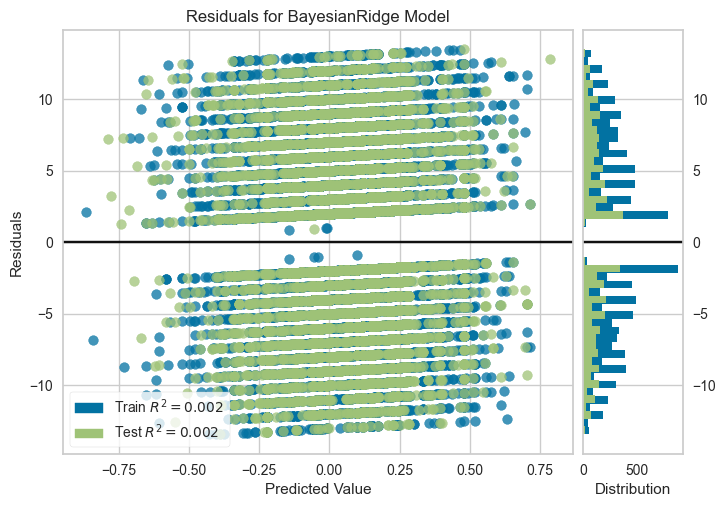

In [38]:
plot_model(best, plot="residuals")

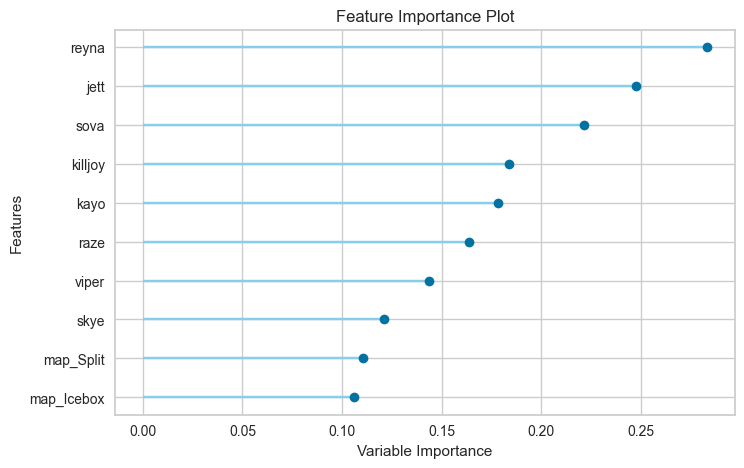

In [39]:
plot_model(best, plot="feature")

#### Let's try the same with match result data: y_result

In [64]:
exp = RegressionExperiment()
exp.setup(X_data, target=y_result)

,Description,Value
0,Session id,4882
1,Target,score diff
2,Target type,Regression
3,Original data shape,"(17527, 28)"
4,Transformed data shape,"(17527, 28)"
5,Transformed train set shape,"(12268, 28)"
6,Transformed test set shape,"(5259, 28)"
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [58]:
best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.4992,0.2497,0.4997,0.0005,0.3514,0.4980,0.0060
lr,Linear Regression,0.4984,0.2498,0.4998,0.0002,0.3514,0.4973,0.2410
ridge,Ridge Regression,0.4984,0.2498,0.4998,0.0000,0.3514,0.4972,0.0050
huber,Huber Regressor,0.4984,0.2498,0.4998,0.0000,0.3514,0.4972,0.0200
llar,Lasso Least Angle Regression,0.5000,0.2500,0.5000,-0.0007,0.3516,0.4988,0.0050
dummy,Dummy Regressor,0.5000,0.2500,0.5000,-0.0007,0.3516,0.4988,0.0050
en,Elastic Net,0.5000,0.2500,0.5000,-0.0007,0.3516,0.4988,0.0050
lasso,Lasso Regression,0.5000,0.2500,0.5000,-0.0007,0.3516,0.4988,0.0050
omp,Orthogonal Matching Pursuit,0.4999,0.2503,0.5003,-0.0016,0.3517,0.4988,0.0040
gbr,Gradient Boosting Regressor,0.4983,0.2504,0.5004,-0.0021,0.3518,0.4968,0.0930


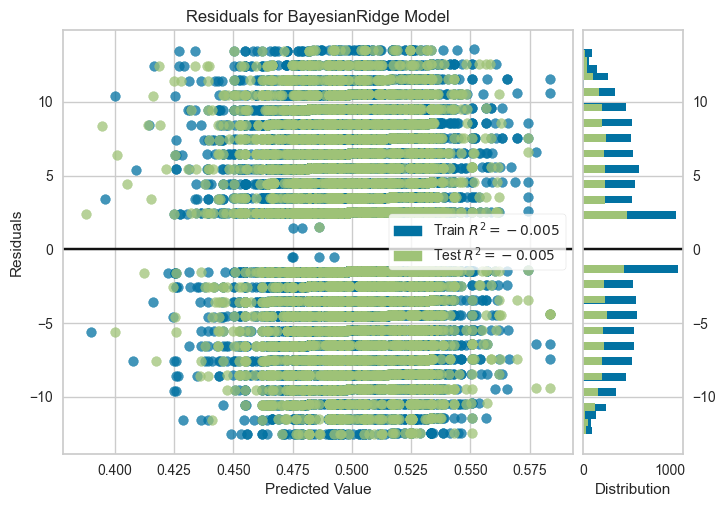

In [59]:
plot_model(best, plot="residuals")

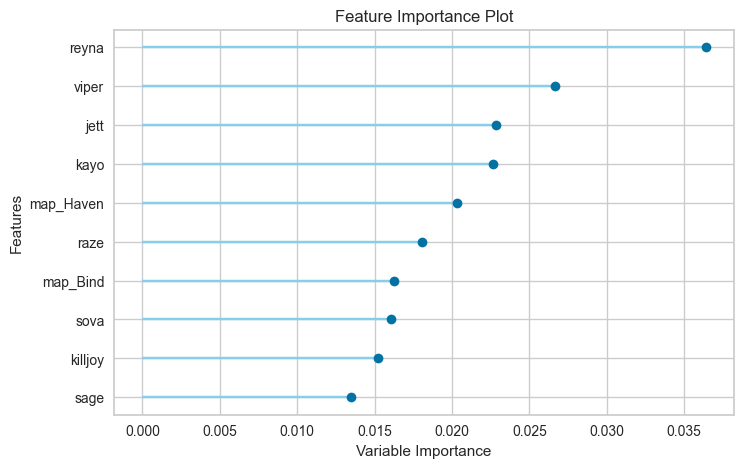

In [60]:
plot_model(best, plot="feature")